****Important – Do not use in production, for demonstration purposes only – please review the legal notices before continuing****

# Retail Sales Data Analysis and Exploration
<!-- <h3><span style="color: #117d30;"> Exploratory Data Analysis and Feature Engineering in Azure ML</span></h3> -->


Retail stores frequently experience supply and demand challenges, which leads to understocking or overstocking situations. This notebook will demonstrate exploratory data analysis, data preparation, and feature engineering for retail sales forecasting.

### Retail Data Dictionary
- store - store number 
- brand - brand indicator
- week - week number
- logmove - log of units sold
- price - price of a single unit
- feat - feature advertisement
- age60 - percentage of the population that is aged 60 or older
- educucation - percentage of the population that has a college degree
- ethinicity - percent of the population that is black or Hispanic
- income - median income
- hhlarge - percentage of households with 5 or more persons
- workwom - percentage of women with full-time jobs
- hval150 - percentage of households worth more than $150,000
- sstrdist - distance to the nearest warehouse store
- sstrvol - ratio of sales of this store to the nearest warehouse store
- cpdist5 - average distance in miles to the nearest 5 supermarkets
- cpwvol5 - ratio of sales of this store to the average of the nearest five store

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data 

In [2]:
# Read data and store it in a dataframe
data = pd.read_csv("retail_sales_dataset.csv")

In [3]:
data.head()

,store,brand,week,logmove,feat,price,age60,education,ethnicity,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdists,cpwvol5
0,2,Brand A,40,9.018695,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
1,2,Brand A,46,8.723231,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
2,2,Brand A,47,8.253228,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
3,2,Brand A,48,8.987197,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
4,2,Brand A,50,9.093357,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927


### Exploratory data analysis (EDA)
Exploratory Data Analysis is an approach that can reduce the challenges of extract, transform, load (ETL) operations. It focuses first on generating business insights and then turns to solving the modeling and ETL tasks.

This is the initial step in data analysis. We are going to explore the data set find missing values and data types of the variables to uncover initial patterns, characteristics, and points of interest.

In [4]:
#Summary Statistics
data.describe

<bound method NDFrame.describe of        store    brand  week    logmove  feat  price     age60  education  \
0          2  Brand A    40   9.018695     0   3.87  0.232865   0.248935   
1          2  Brand A    46   8.723231     0   3.87  0.232865   0.248935   
2          2  Brand A    47   8.253228     0   3.87  0.232865   0.248935   
3          2  Brand A    48   8.987197     0   3.87  0.232865   0.248935   
4          2  Brand A    50   9.093357     0   3.87  0.232865   0.248935   
...      ...      ...   ...        ...   ...    ...       ...        ...   
28942    137  Brand B   156   7.987524     0   2.00  0.209602   0.528362   
28943    137  Brand B   157   8.502689     0   1.94  0.209602   0.528362   
28944    137  Brand B   158   9.505991     0   1.59  0.209602   0.528362   
28945    137  Brand B   159  10.927376     0   1.49  0.209602   0.528362   
28946    137  Brand B   160   8.859363     0   1.75  0.209602   0.528362   

       ethnicity     income   hhlarge   workwom   hva

In [5]:
# Get information about data including null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28947 entries, 0 to 28946
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store      28947 non-null  int64  
 1   brand      28947 non-null  object 
 2   week       28947 non-null  int64  
 3   logmove    28947 non-null  float64
 4   feat       28947 non-null  int64  
 5   price      28947 non-null  float64
 6   age60      28947 non-null  float64
 7   education  28947 non-null  float64
 8   ethnicity  28947 non-null  float64
 9   income     28947 non-null  float64
 10  hhlarge    28947 non-null  float64
 11  workwom    28947 non-null  float64
 12  hval150    28947 non-null  float64
 13  sstrdist   28947 non-null  float64
 14  sstrvol    28947 non-null  float64
 15  cpdists    28947 non-null  float64
 16  cpwvol5    28947 non-null  float64
dtypes: float64(13), int64(3), object(1)
memory usage: 3.8+ MB


### Data visualization

Text(0, 0.5, 'Price ($)')

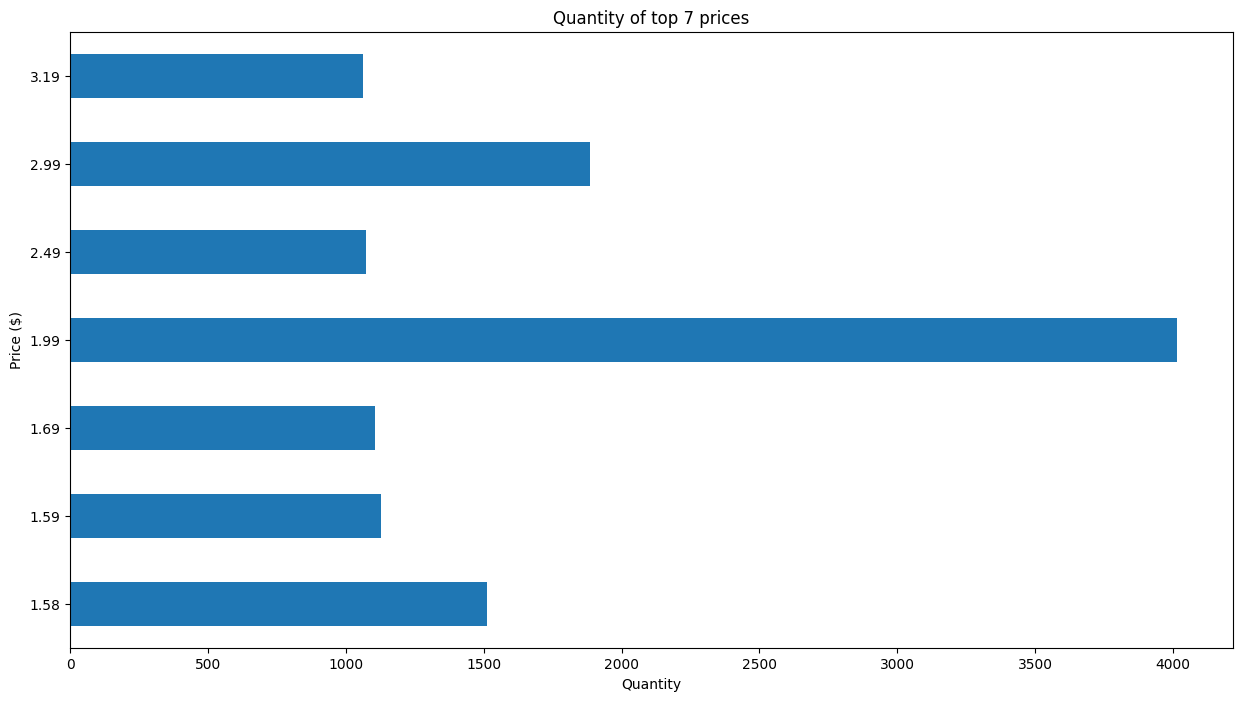

In [6]:
# Visualize distribution of different prices
s = data.price.value_counts()
plt.figure(figsize=(15,8))
s.nlargest(7).sort_index().plot(kind='barh').set_title("Quantity of top 7 prices")
plt.xlabel("Quantity")
plt.ylabel("Price ($)")

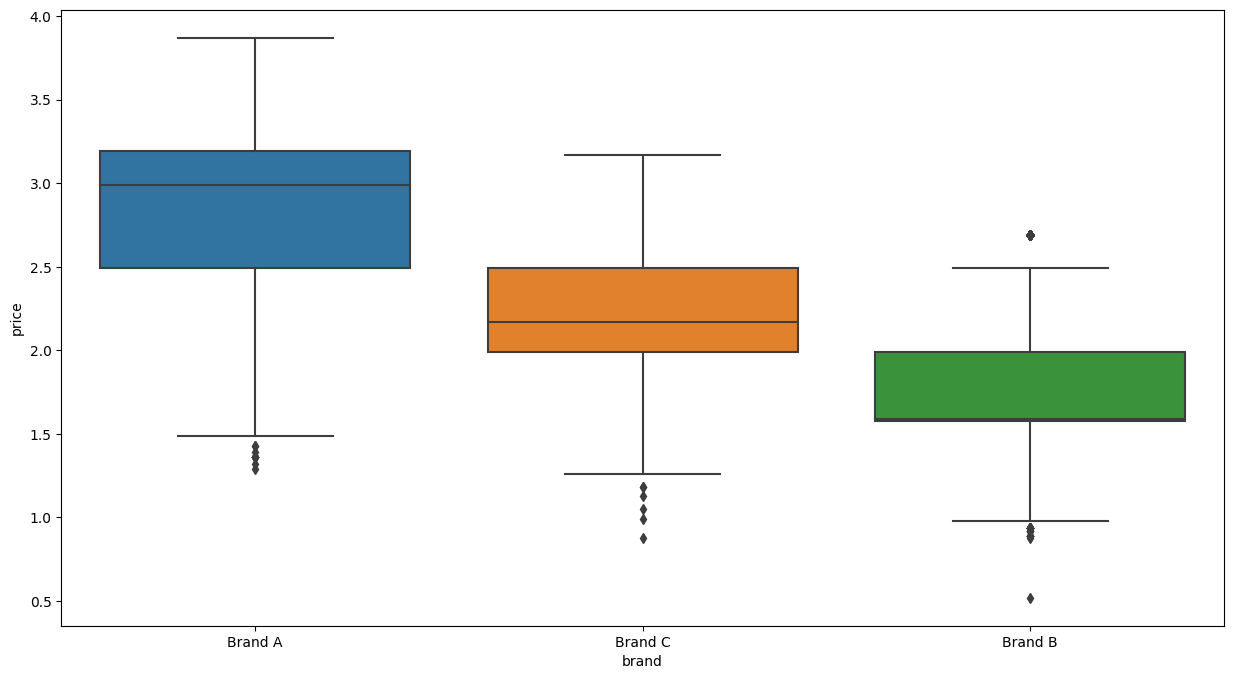

In [7]:
#Visualize the prices for all 3 brands
plt.figure(figsize=(15,8))
sns.boxplot(x=data["brand"], y= data['price'])

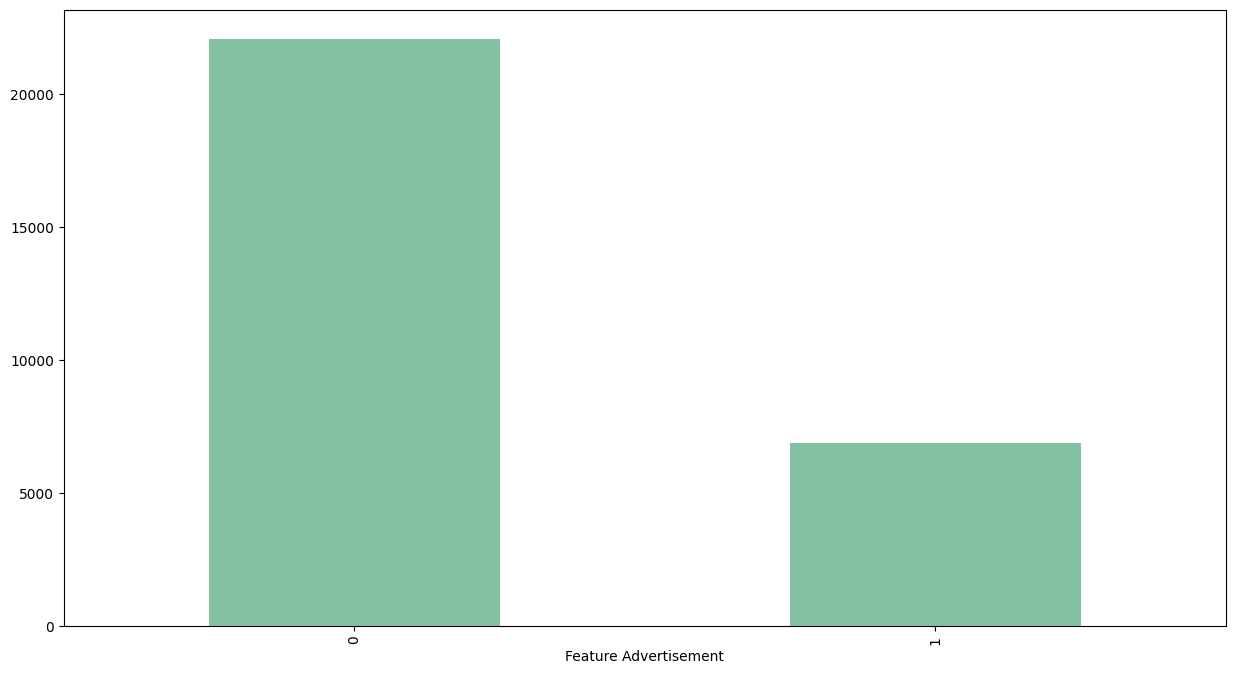

In [8]:
# Was the product featured on an advertisement?
GroupedData=data.groupby(by='feat').size()
plt.figure(figsize=(15,8))
GroupedData.plot(kind='bar', color=(0.2, 0.6, 0.4, 0.6))
plt.xlabel("Feature Advertisement")
plt.show()

In [9]:
#Check quantity of each brand
brands = data['brand'].value_counts()
brands

Brand A    9649
Brand B    9649
Brand C    9649
Name: brand, dtype: int64

### Calculating date and time
Converting week number into a valid date and time for each purchase to build a forecasting model

In [10]:
weeks2 = data['week']
weeks = []
for week in weeks2:
    temp = week - 15
    weeks.append(temp)

In [11]:
max(weeks2)

160

In [12]:
# Converting week number into a relevant datetime format
import datetime
datetimeformat = []
for week in weeks:
    if week < 53:
        d = "2018-W" + str(week)
    elif week > 52 and week < 105:
        week = week - 52
        d = "2019-W" + str(week)
    elif week > 104 and week < 157:
        week = week - 104
        d = "2020-W" + str(week)
    else:
        week = week - 156
        d = "2021-W" + str(week)

    r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
    datetimeformat.append(r)

In [13]:
#Add datetime column as 'time'
data['time'] = datetimeformat
data.head()

,store,brand,week,logmove,feat,price,age60,education,ethnicity,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdists,cpwvol5,time
0,2,Brand A,40,9.018695,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927,2018-06-18
1,2,Brand A,46,8.723231,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927,2018-07-30
2,2,Brand A,47,8.253228,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927,2018-08-06
3,2,Brand A,48,8.987197,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927,2018-08-13
4,2,Brand A,50,9.093357,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927,2018-08-27


In [14]:
#Save to a new dataset
data.to_csv(r'retail_sales_datasetv2.csv', index = False)